## Estadística Aplicada

Paulina Quiroz Sánchez  1723927

Grupo 41


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [97]:
#Cargar base de datos
metrorrey = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')

In [98]:
metrorrey.head()

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.0,3240.0
1,1995/02,2879.0,3623.0
2,1995/03,3103.0,3990.0
3,1995/04,3491.0,3321.0
4,1995/05,3109.0,3777.0


In [99]:
metrorrey.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [100]:
metrorrey['mes'] = pd.to_datetime(metrorrey['mes'],format='%Y/%m')

In [101]:
metrorrey=metrorrey.set_index('mes')

In [102]:
metrorrey.isnull().sum()

miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [103]:
metrorrey.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq=None)

In [104]:
metrorrey.index.freq = 'MS'

In [105]:
metrorrey.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

In [106]:
metrorrey.dtypes

miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [107]:
min_fecha = metrorrey.index.min()
max_fecha = metrorrey.index.max()
print(f'Rango de fechas: {min_fecha} a {max_fecha}')

Rango de fechas: 1995-01-01 00:00:00 a 2023-08-01 00:00:00


In [108]:
num_observaciones = metrorrey.count()[0]
print(f"Son {num_observaciones} observaciones")

Son 344 observaciones


In [109]:
min_pasajeros = metrorrey['miles de pasajeros'].min()
max_pasajeros = metrorrey['miles de pasajeros'].max()
print(f"Valor mínimo de pasajeros: {min_pasajeros}")
print(f"Valor máximo de pasajeros: {max_pasajeros}")

Valor mínimo de pasajeros: 2397.0
Valor máximo de pasajeros: 17534.523


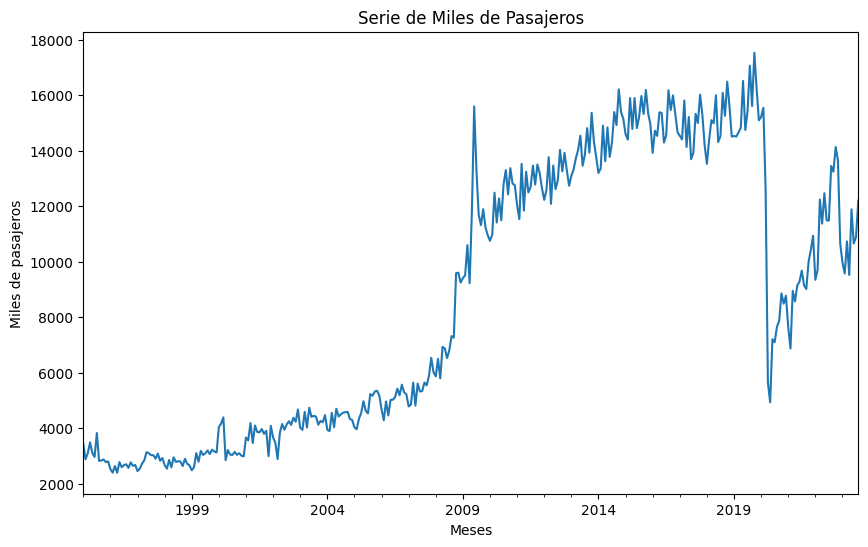

In [110]:
metrorrey['miles de pasajeros'].plot(figsize=(10,6))
plt.title('Serie de Miles de Pasajeros')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Meses')
plt.show();

In [143]:
media_movil = metrorrey['miles de pasajeros'].rolling(7, center=True).mean()

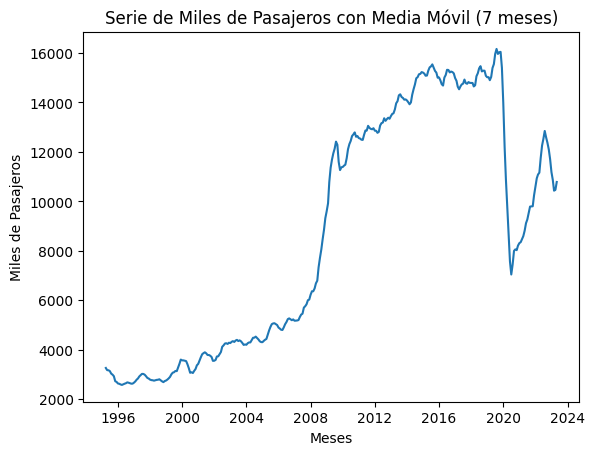

In [112]:
plt.plot(media_movil)
plt.title('Serie de Miles de Pasajeros con Media Móvil (7 meses)')
plt.xlabel('Meses')
plt.ylabel('Miles de Pasajeros')
plt.show();


La serie tiene tendencia creciente, podemos notar la caída después de 2020, puede deberse a la pandemia que ocurria en ese entonces.

In [113]:
from statsmodels.tsa.api import seasonal_decompose

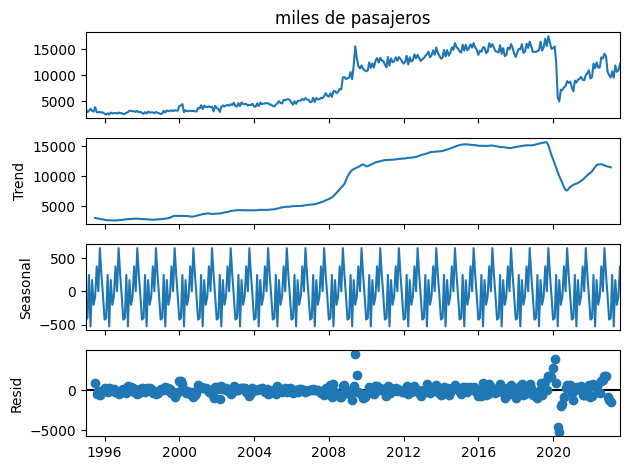

In [114]:
serie1=seasonal_decompose(metrorrey['miles de pasajeros'],model='ad')
serie1.plot()
plt.show()
#Trend es tendencia/ciclo

In [115]:
serie1.seasonal.iloc[0:12]

mes
1995-01-01   -422.310072
1995-02-01   -401.322511
1995-03-01    246.389197
1995-04-01   -524.477048
1995-05-01    169.319975
1995-06-01   -200.241576
1995-07-01    -74.189908
1995-08-01    374.483711
1995-09-01      2.471197
1995-10-01    648.149002
1995-11-01    248.553510
1995-12-01    -66.825475
Freq: MS, Name: seasonal, dtype: float64

In [116]:
#Los meses con mayor numero de pasajeros son: Marzo, Mayo, Agosto, Octubre y Noviembre
#Los meses que hay menos pasajeros en metrorrey: Enero, Febrero, Abril, Junio, Septiembre y Diciembre, por lo que son los mas adecuados para hacer mantinimiento.

In [117]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [118]:
model = ExponentialSmoothing(metrorrey['miles de pasajeros'], trend='add', seasonal='add', seasonal_periods=12)
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [119]:
pronostico = results.forecast(steps=5)

In [120]:
ingresos_estimados = pronostico * 7.1

In [121]:
print('Pronósticos de pasajeros para los próximos 5 meses:\n', pronostico)


Pronósticos de pasajeros para los próximos 5 meses:
 2023-09-01    11376.365802
2023-10-01    12100.389440
2023-11-01    11383.638273
2023-12-01    10864.113659
2024-01-01    10795.714684
Freq: MS, dtype: float64


In [122]:
print('Ingresos estimados para los próximos 5 meses:\n',ingresos_estimados)

Ingresos estimados para los próximos 5 meses:
 2023-09-01    80772.197193
2023-10-01    85912.765023
2023-11-01    80823.831741
2023-12-01    77135.206982
2024-01-01    76649.574259
Freq: MS, dtype: float64


In [123]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

## Modelo de ARMA
from statsmodels.tsa.arima.model import ARIMA

In [124]:
# prueba de dickey-fuller
ADF_test1 = adfuller(metrorrey['miles de pasajeros'].dropna())
#Ho: Serie No estacionaria

#significancia 5%
alpha =0.05

if ADF_test1[1] < alpha:
    print('rechazamos Ho, La serie es estacionaria')
else:
    print('No rechazamos Ho, La serie es No estacionaria')

No rechazamos Ho, La serie es No estacionaria


In [125]:
metrorrey['miles de pasajeros_diff']=metrorrey['miles de pasajeros'].diff()

In [126]:
metrorrey.head()

,miles de pasajeros,ingresos (miles de pesos),miles de pasajeros_diff
mes,,,
1995-01-01,3439.0,3240.0,NaN
1995-02-01,2879.0,3623.0,-560.0
1995-03-01,3103.0,3990.0,224.0
1995-04-01,3491.0,3321.0,388.0
1995-05-01,3109.0,3777.0,-382.0


In [128]:
ADF_test2 = adfuller(metrorrey['miles de pasajeros_diff'].dropna())
#Ho: Serie No estacionaria

#significancia 5%
alpha =0.05

if ADF_test2[1] < alpha:
    print('Rechazamos Ho, La serie es estacionaria')
else:
    print('No rechazamos Ho, La serie es No estacionaria')

Rechazamos Ho, La serie es estacionaria


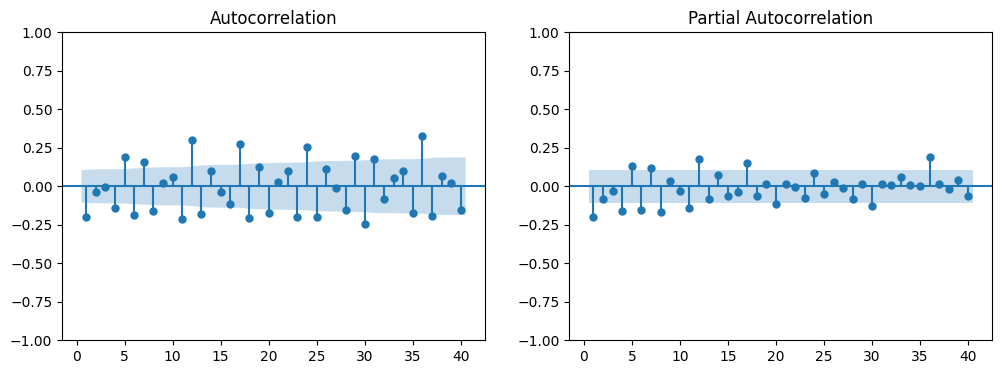

In [129]:
ig, ax = plt.subplots(1,2,figsize=(12,4))

plot_acf(metrorrey['miles de pasajeros_diff'].dropna(), zero=False, lags=40, ax=ax[0])
plot_pacf(metrorrey['miles de pasajeros_diff'].dropna(), zero=False, lags=40, ax=ax[1])
plt.show()

La serie miles de pasajeros tiene componente estacional

In [130]:
pip install pmdarima

In [131]:
import pmdarima as pm

In [145]:
## determinar el orden del proceso
arimaorder_bic=pm.auto_arima(metrorrey['miles de pasajeros'],
                start_p=1,start_q=1,
                max_p=7, max_q=7,
                information_criterion='bic',
                seasonal=True,
                m=12,
                start_P=1, start_Q=1,
                max_P=7, max_Q=7)
arimaorder_bic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

In [146]:
orden_seleccionado= arimaorder_bic.order
print(f'El orden del modelo ARIMA seleccionado es:', orden_seleccionado)

El orden del modelo ARIMA seleccionado es: (0, 1, 0)


In [150]:
model = ARIMA(metrorrey['miles de pasajeros'],
              order=(0,1,0),
              seasonal_order=(1,0,1,12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -2780.440
Date:                            Sun, 05 Nov 2023   AIC                           5566.880
Time:                                    02:31:58   BIC                           5578.394
Sample:                                01-01-1995   HQIC                          5571.466
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9728      0.023     42.860      0.000       0.928       1.017
ma.S.L12      -0.8414      0.049   

In [169]:
from statsmodels.graphics.tsaplots import plot_predict

Text(0, 0.5, 'Miles de pasajeros')

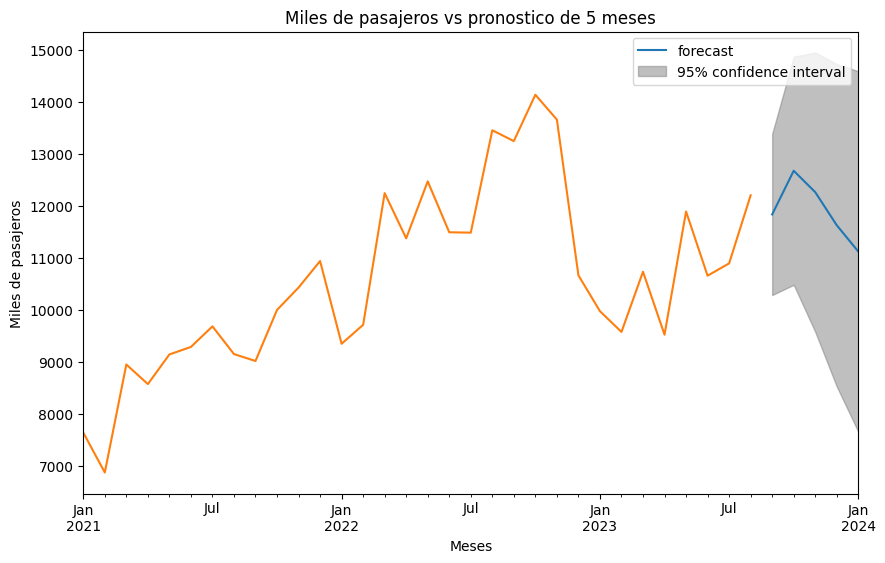

In [170]:
plot_predict(results, '2023-09-01', '2024-01-01')
metrorrey['miles de pasajeros']['2021':].plot(figsize=(10,6))
plt.title('Miles de pasajeros vs pronostico de 5 meses')
plt.xlabel('Meses')
plt.ylabel('Miles de pasajeros')

In [158]:
forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [159]:
inicio = '2023-09-01'
fin =  '2024-01-01'

In [160]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

In [161]:
df_forecast = pd.DataFrame({
    'pronostico (miles de pasajeros)': pronostico_valor,
    'limite inf' : pronostico_intervalos['lower miles de pasajeros'],
    'limite max' : pronostico_intervalos['upper miles de pasajeros']
})

In [162]:
df_forecast

,pronostico (miles de pasajeros),limite inf,limite max
2023-09-01,11835.040432,10285.512541,13384.568323
2023-10-01,12674.548657,10483.185298,14865.912016
2023-11-01,12263.784441,9579.923406,14947.645476
2023-12-01,11627.552188,8528.496406,14726.607970
2024-01-01,11123.199930,7658.350608,14588.049252


In [163]:
df_forecast2 = pd.DataFrame({
    'pronostico (miles de pasajeros)': pronostico_valor*7.1,
    'limite inf' : pronostico_intervalos['lower miles de pasajeros']*7.1,
    'limite max' : pronostico_intervalos['upper miles de pasajeros']*7.1
})

In [164]:
df_forecast2

,pronostico (miles de pasajeros),limite inf,limite max
2023-09-01,84028.787066,73027.139039,95030.435093
2023-10-01,89989.295464,74430.615616,105547.975312
2023-11-01,87072.869531,68017.456181,106128.282881
2023-12-01,82555.620535,60552.324481,104558.916589
2024-01-01,78974.719502,54374.289319,103575.149686
